In [5]:
pip install pandas numpy nltk scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
file_path = 'NLP-Emotion-Dataset.csv'  #datatest
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')


In [27]:
# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")


In [17]:
# Rename the column 'comments' to 'text' if necessary
df.rename(columns={'comments': 'text'}, inplace=True)


In [28]:
# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


In [29]:
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

In [30]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [31]:
# Apply KMeans clustering
num_clusters = 5  # We have 5 emotions to detect
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(X)


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Example of assigning emotions manually based on observations
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

df['emotion'] = df['cluster'].map(cluster_emotions)

In [34]:
# Calculate silhouette score
sil_score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.004188473417400872


In [45]:
# Calculate silhouette score
sil_score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.004188473417400872


In [46]:
# Display the DataFrame with emotions
print(df.head())

                            i didnt feel humiliated;  \
0  i can go from feeling so hopeless to so damned...   
1  im grabbing a minute to post i feel greedy wrong;   
2  i am ever feeling nostalgic about the fireplac...   
3                              i am feeling grouchy;   
4  ive been feeling a little burdened lately wasn...   

                                      processed_text  cluster  emotion  
0  go feeling hopeless damned hopeful around some...        1  Sadness  
1          im grabbing minute post feel greedy wrong        3     Love  
2  ever feeling nostalgic fireplace know still pr...        1  Sadness  
3                                    feeling grouchy        1  Sadness  
4      ive feeling little burdened lately wasnt sure        1  Sadness  


In [47]:
# Optionally, save the DataFrame to a new CSV file
df.to_csv('output_with_emotions.csv', index=False)
#this will give the output of the emotion in a csv, we can see it on the end of each text

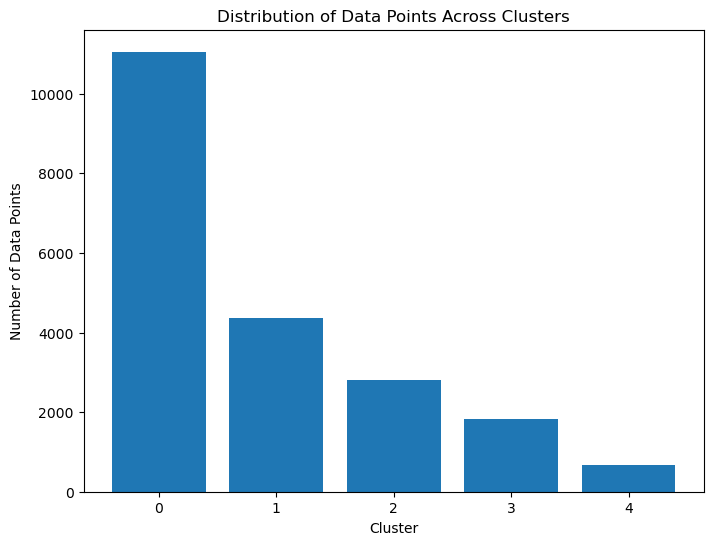

In [41]:
import matplotlib.pyplot as plt

# Count the number of data points in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the distribution of data points across clusters
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.xticks(cluster_counts.index)
plt.show()


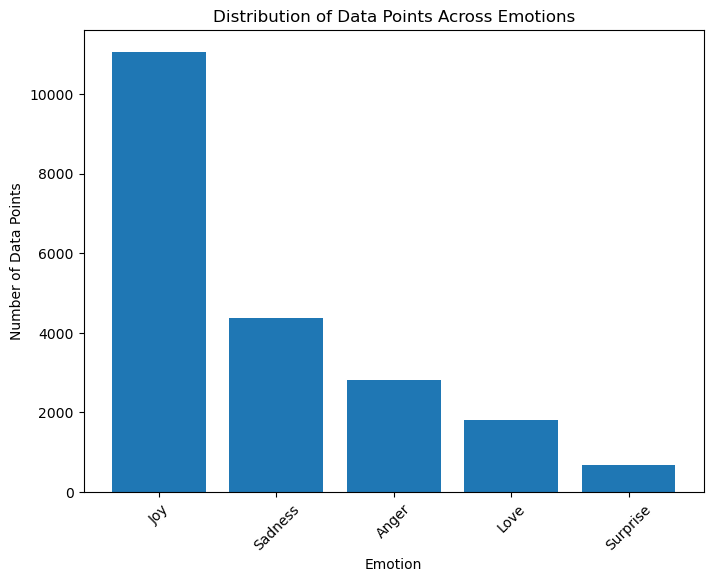

In [42]:
# This is just to make the output so we will be able to know the number of emotion
# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

# Rename the clusters in the DataFrame using the dictionary
df['emotion'] = df['cluster'].map(cluster_emotions)

# Count the number of data points in each emotion
emotion_counts = df['emotion'].value_counts()

# Plot the distribution of data points across emotions
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [43]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Get inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 20226.21471710603


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Shit DBSCAN Method

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Silhouette Score: -0.013466380577307795


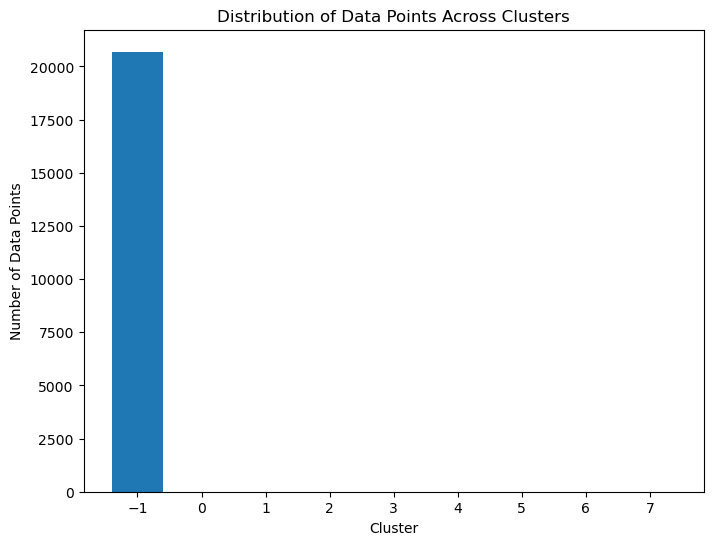

In [4]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load data
file_path = 'NLP-Emotion-Dataset.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Assign cluster labels to DataFrame
df['cluster'] = clusters

# Calculate silhouette score
sil_score = silhouette_score(X, clusters)
print(f'Silhouette Score: {sil_score}')

# Plot the distribution of data points across clusters
cluster_counts = df['cluster'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.xticks(cluster_counts.index)
plt.show()

In [5]:
pip install pandas numpy nltk scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


GMM Method (Gaussian Mixture Model)

In [32]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Load data
file_path = 'NLP-Emotion-Dataset.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

In [35]:
# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")


In [37]:
# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


In [38]:
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

In [39]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [40]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components based on your dataset
X_reduced = pca.fit_transform(X.toarray())

In [41]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_labels = gmm.fit_predict(X_reduced)

In [42]:
# Assign cluster labels to DataFrame
df['cluster'] = gmm_labels

In [43]:
# Calculate silhouette score
sil_score = silhouette_score(X_reduced, gmm_labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: -0.02589114045813265


In [44]:
# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

In [45]:
# Map cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_emotions)

In [50]:
# Plot the distribution of data points across emotions
emotion_counts = df['emotion'].value_counts()

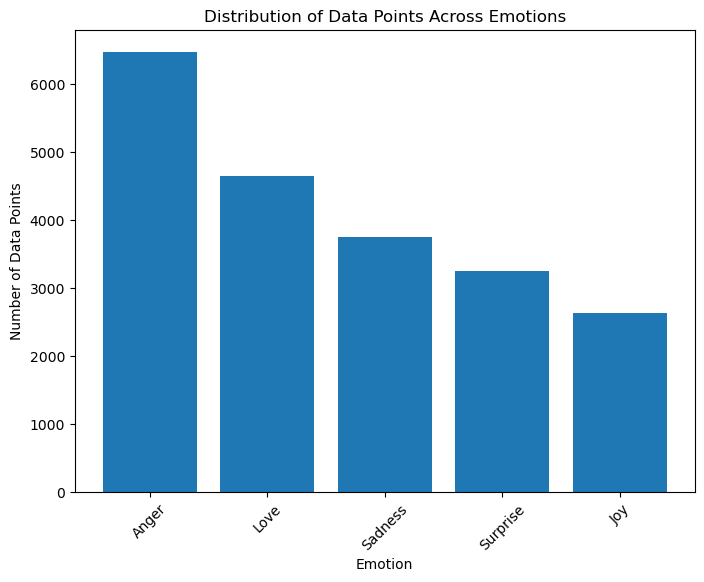

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [48]:
# Save the DataFrame (using GMM method) with emotions to a new CSV file
output_file_path = 'output_with_emotions_GMM.csv'
df.to_csv(output_file_path, index=False)
print(f'Results saved to {output_file_path}')

Results saved to output_with_emotions_GMM.csv


In [49]:
# Display the first few rows of the output DataFrame to check
df.head()

,Texts,processed_text,cluster,emotion
0,i didnt feel humiliated;,didnt feel humiliated,3,Love
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,3,Love
2,im grabbing a minute to post i feel greedy wrong;,im grabbing minute post feel greedy wrong,2,Anger
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,1,Sadness
4,i am feeling grouchy;,feeling grouchy,2,Anger


Another optimized KMeans Method Machine Learning Algorithm

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

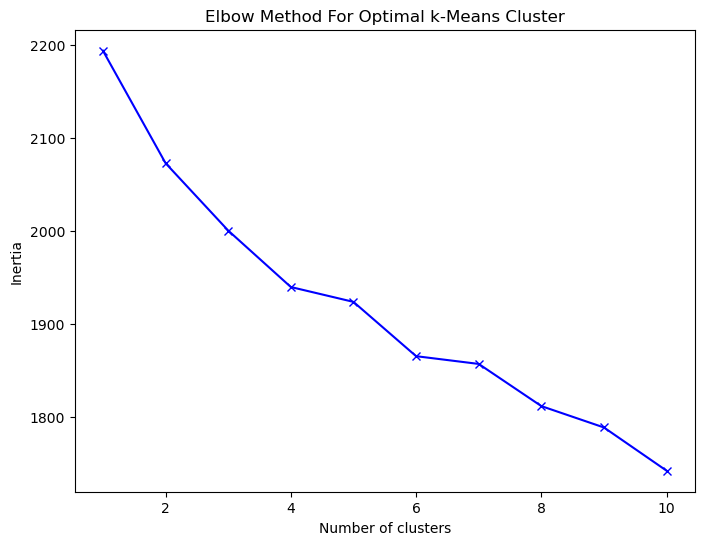

c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.0824119612252155


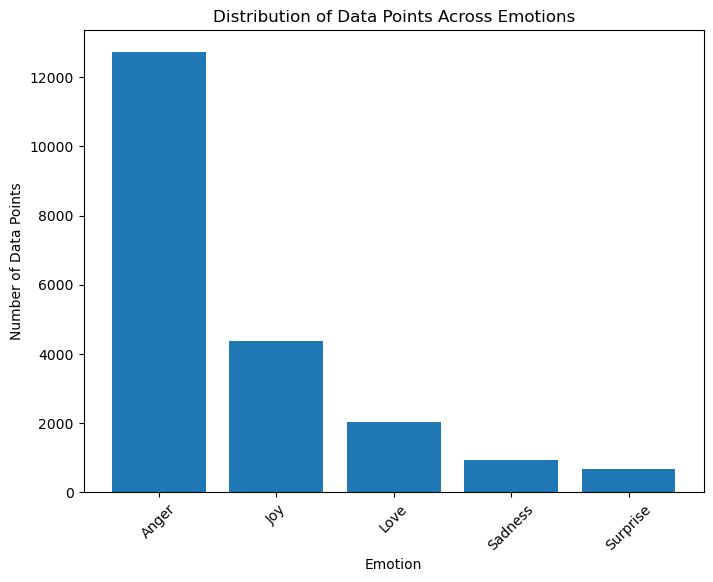

Results saved to output_with_emotions_KmeansElbow.csv


,Texts,processed_text,cluster,emotion
0,i didnt feel humiliated;,didnt feel humiliated,2,Anger
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,0,Joy
2,im grabbing a minute to post i feel greedy wrong;,im grabbing minute post feel greedy wrong,3,Love
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,4,Surprise
4,i am feeling grouchy;,feeling grouchy,0,Joy


In [3]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load data
file_path = 'NLP-Emotion-Dataset.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components based on your dataset
X_reduced = pca.fit_transform(X.toarray())

# Use the Elbow Method to find the optimal number of clusters
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k-Means Cluster')
plt.show()

# Fit KMeans with the optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(X_reduced)

# Assign cluster labels to DataFrame
df['cluster'] = kmeans_labels

# Calculate silhouette score
sil_score = silhouette_score(X_reduced, kmeans_labels)
print(f'Silhouette Score: {sil_score}')

# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

# Map cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_emotions)

# Plot the distribution of data points across emotions
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Save the DataFrame with emotions to a new CSV file
output_file_path = 'output_with_emotions_KmeansElbow.csv'
df.to_csv(output_file_path, index=False)
print(f'Results saved to {output_file_path}')

# Display the first few rows of the output DataFrame to check
df.head()

Use T-SNE technique, usually more effective at preserving the local structure of the data, which can help improve clustering performance

In [26]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [7]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...


True

In [9]:
# Load data
file_path = 'NLP-Emotion-Dataset.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

In [10]:
# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")


In [11]:
# Preprocessing function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


In [12]:
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

In [13]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [14]:
# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
X_reduced = tsne.fit_transform(X.toarray())

In [15]:
#Fit KMeans clustering (you can also try other clustering algorithms)
num_clusters = 5  # Adjust based on your dataset and observations
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X_reduced)

c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Assign cluster labels to DataFrame
df['cluster'] = kmeans_labels

In [27]:
# Calculate silhouette score
sil_score = silhouette_score(X_reduced, kmeans_labels)
print(f'Silhouette Score: {sil_score}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_reduced, kmeans_labels)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_reduced, kmeans_labels)
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.3189692199230194
Davies-Bouldin Index: 0.9214278591806668
Calinski-Harabasz Index: 15052.785562503721


In [18]:
# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

In [19]:
# Map cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_emotions)

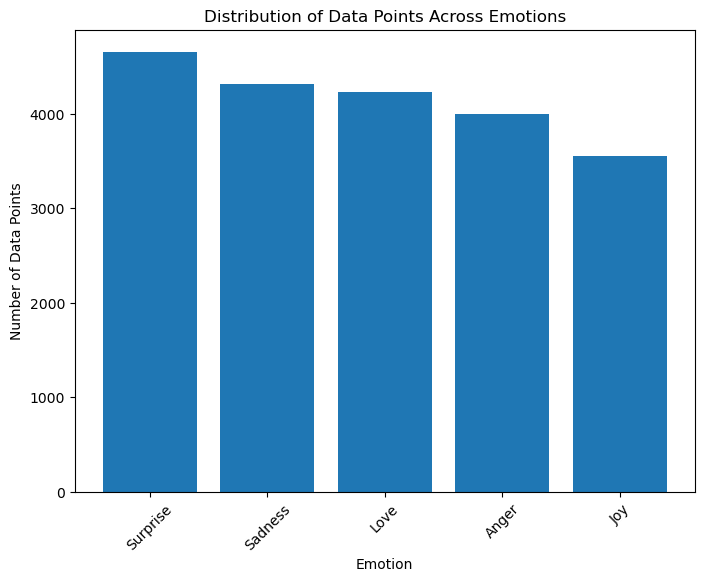

In [20]:
# Plot the distribution of data points across emotions
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

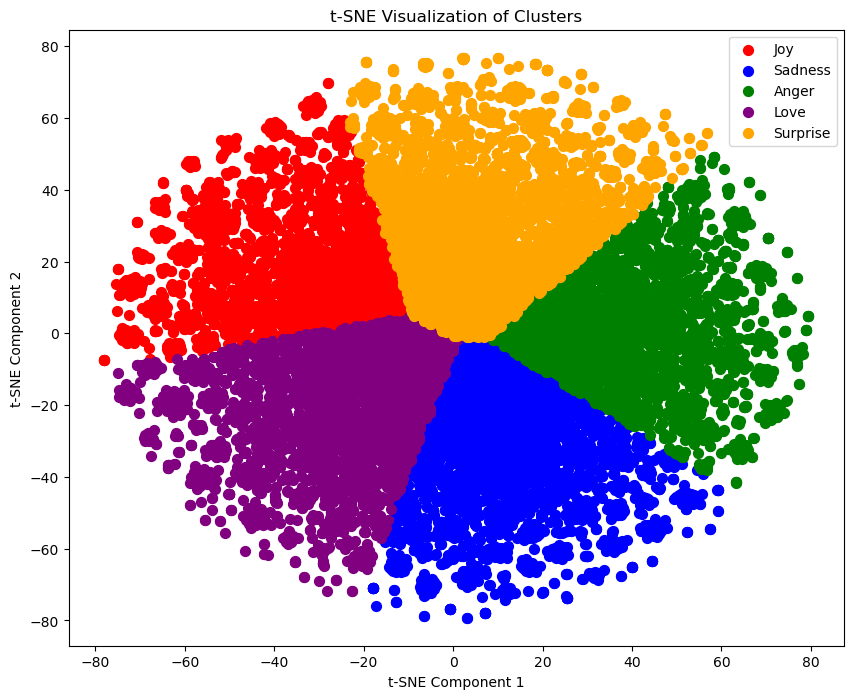

In [21]:
# Plot the t-SNE result
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_clusters):
    cluster_points = X_reduced[df['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=cluster_emotions[i])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

In [22]:
# Save the DataFrame with emotions to a new CSV file
output_file_path = 'output_with_emotions_with_TSNEkmeans.csv'
df.to_csv(output_file_path, index=False)
print(f'Results saved to {output_file_path}')

Results saved to output_with_emotions_with_TSNEkmeans.csv


In [23]:
# Display the first few rows of the output DataFrame to check
df.head()

,Texts,processed_text,cluster,emotion
0,i didnt feel humiliated;,didnt feel humiliated,1,Sadness
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,2,Anger
2,im grabbing a minute to post i feel greedy wrong;,im grabbing minute post feel greedy wrong,4,Surprise
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,4,Surprise
4,i am feeling grouchy;,feeling grouchy,3,Love


Ini iseng pakai perplexity dan divergence

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt


In [3]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Load data
file_path = 'NLP-Emotion-Dataset-5k.csv'
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

In [12]:
# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")



In [17]:
# Preprocessing function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


In [15]:
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)

In [16]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [18]:
# Define a range of perplexity values to experiment with
perplexities = [5, 10, 30, 50, 100]

In [19]:
# Dictionary to store t-SNE results for each perplexity
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    X_reduced = tsne.fit_transform(X.toarray())
    tsne_results[perplexity] = X_reduced


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\skl

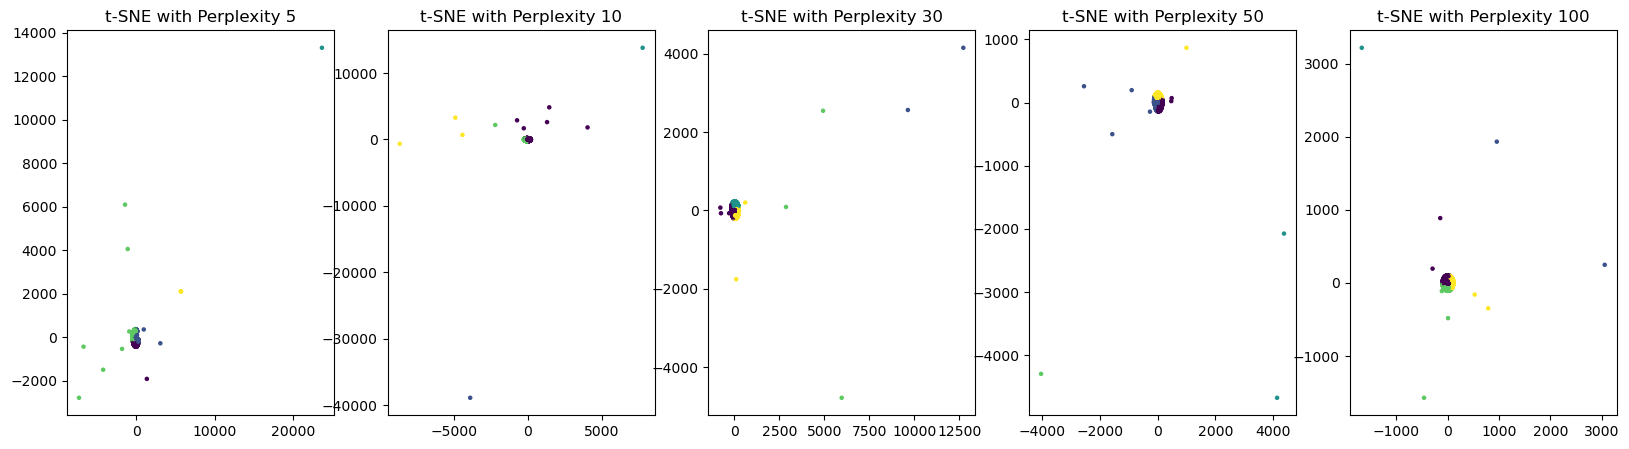

In [20]:
# Plot the t-SNE results for different perplexity values
fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 5))
for ax, perplexity in zip(axes, perplexities):
    X_reduced = tsne_results[perplexity]
    kmeans = KMeans(n_clusters=5, random_state=0)
    kmeans_labels = kmeans.fit_predict(X_reduced)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', s=5)
    ax.set_title(f't-SNE with Perplexity {perplexity}')
plt.show()

In [21]:
# Evaluate the clustering with the best perplexity visually or using silhouette score
best_perplexity = 30  # Assume best perplexity based on visual inspection or metrics
X_reduced = tsne_results[best_perplexity]

In [22]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_reduced)

c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Assign cluster labels to DataFrame
df['cluster'] = kmeans_labels

In [24]:
# Calculate internal metrics
sil_score = silhouette_score(X_reduced, kmeans_labels)
print(f'Silhouette Score: {sil_score}')

db_index = davies_bouldin_score(X_reduced, kmeans_labels)
print(f'Davies-Bouldin Index: {db_index}')

ch_score = calinski_harabasz_score(X_reduced, kmeans_labels)
print(f'Calinski-Harabasz Index: {ch_score}')


Silhouette Score: 0.9276325106620789
Davies-Bouldin Index: 0.7190566701263816
Calinski-Harabasz Index: 66781.41361536569


In [25]:
# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

In [26]:
# Map cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_emotions)

In [27]:
# Plot the distribution of data points across emotions
emotion_counts = df['emotion'].value_counts()

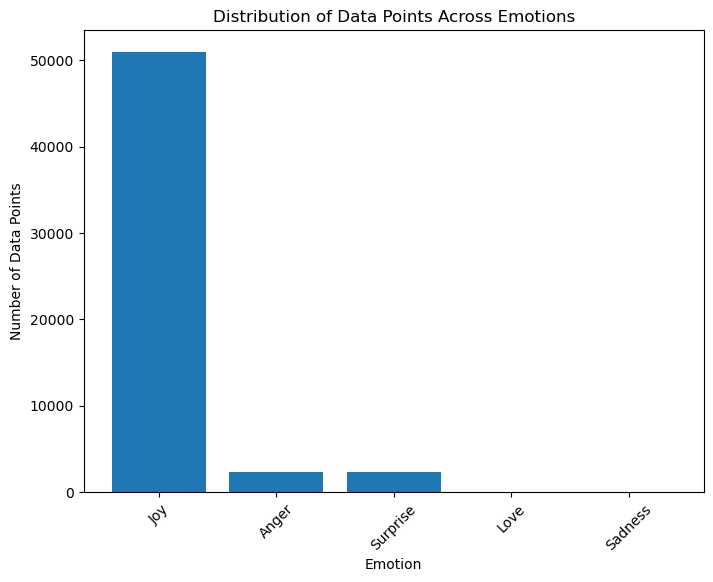

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

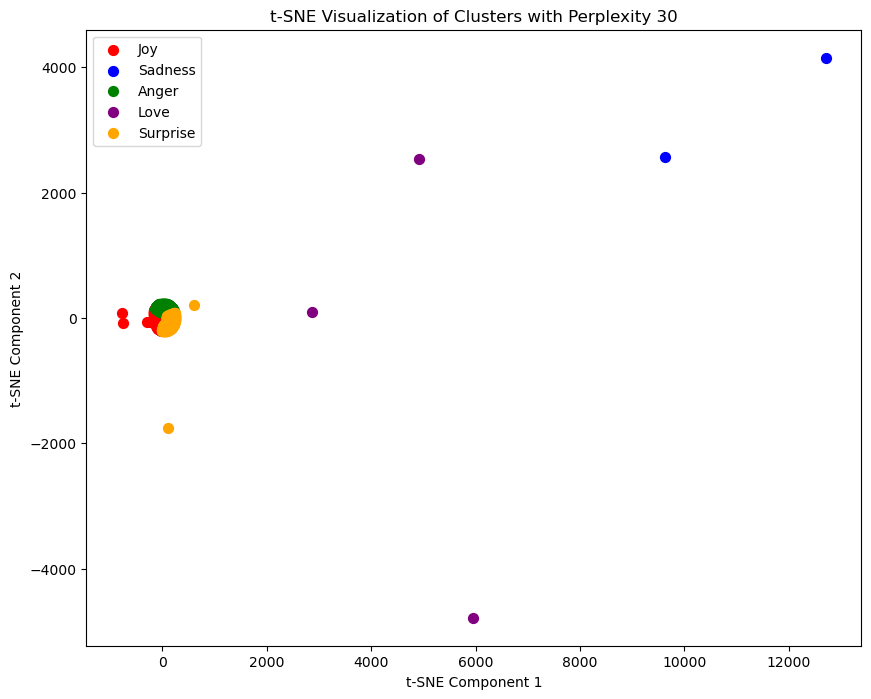

In [29]:
# Plot the t-SNE result with the best perplexity
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    cluster_points = X_reduced[df['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=cluster_emotions[i])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f't-SNE Visualization of Clusters with Perplexity {best_perplexity}')
plt.legend()
plt.show()

In [56]:
# Save the DataFrame with emotions to a new CSV file
output_file_path = 'output_with_emotions_perplexity_5kdatas.csv'
df.to_csv(output_file_path, index=False)
print(f'Results saved to {output_file_path}')

Results saved to output_with_emotions_perplexity.csv


In [57]:
# Display the first few rows of the output DataFrame to check
df.head()

,Texts,processed_text,cluster,emotion
0,i didnt feel humiliated;,didnt feel humiliated,1,Sadness
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,2,Anger
2,im grabbing a minute to post i feel greedy wrong;,im grabbing minute post feel greedy wrong,4,Surprise
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,4,Surprise
4,i am feeling grouchy;,feeling grouchy,3,Love


Optimized Version

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [2]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikolas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load data
file_path = 'NLP-Emotion-Dataset-5k.csv'
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

In [4]:
# Automatically identify the text column
text_column = None
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains text data
        text_column = column
        break

if text_column is None:
    raise ValueError("No text column found in the DataFrame. Please check your data.")


In [5]:
# Preprocessing function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


In [6]:
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].fillna('').apply(preprocess_text)


In [7]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [8]:
# Define a range of perplexity values to experiment with
perplexities = [5, 10, 30, 50, 100]

In [9]:
# Dictionary to store t-SNE results for each perplexity
tsne_results = {}

In [10]:
for perplexity in perplexities:
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    X_reduced = tsne.fit_transform(X.toarray())
    tsne_results[perplexity] = X_reduced


In [11]:
# Define clustering algorithms to experiment with Kmeans and DBSCAN
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=0),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=5)
}


In [12]:
# Evaluate each clustering algorithm with each t-SNE result
results = []

for perplexity, X_reduced in tsne_results.items():
    for algo_name, algo in clustering_algorithms.items():
        if algo_name == 'DBSCAN':
            # DBSCAN does not require fit_predict
            labels = algo.fit_predict(X_reduced)
        else:
            labels = algo.fit_predict(X_reduced)
        
        # Calculate internal metrics
        sil_score = silhouette_score(X_reduced, labels)
        db_index = davies_bouldin_score(X_reduced, labels)
        ch_score = calinski_harabasz_score(X_reduced, labels)
        
        results.append({
            'Perplexity': perplexity,
            'Algorithm': algo_name,
            'Silhouette Score': sil_score,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Index': ch_score
        })


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Nikolas\anaconda3\Lib\site-packages\skl

In [13]:
# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

print(results_df)

    Perplexity                Algorithm  Silhouette Score  \
0            5                   KMeans          0.930813   
1            5                   DBSCAN          0.902439   
2            5  AgglomerativeClustering          0.922290   
3           10                   KMeans          0.904267   
4           10                   DBSCAN          0.886081   
5           10  AgglomerativeClustering          0.899132   
6           30                   KMeans          0.927633   
7           30                   DBSCAN          0.895629   
8           30  AgglomerativeClustering          0.928130   
9           50                   KMeans          0.928368   
10          50                   DBSCAN          0.895770   
11          50  AgglomerativeClustering          0.918394   
12         100                   KMeans          0.909380   
13         100                   DBSCAN          0.883362   
14         100  AgglomerativeClustering          0.904242   

    Davies-Bouldin Inde

In [14]:
# Choose the best result based on one of the metrics, e.g., Silhouette Score
best_result = results_df.loc[results_df['Silhouette Score'].idxmax()]

best_perplexity = best_result['Perplexity']
print(f"Best Perplexity: {best_perplexity}")

best_algorithm_name = best_result['Algorithm']
print(f"Best Algorithm: {best_algorithm_name}")

Best Perplexity: 5
Best Algorithm: KMeans


In [15]:
# Use the best perplexity and algorithm to fit the final model
X_reduced = tsne_results[best_perplexity]
best_algorithm = clustering_algorithms[best_algorithm_name]

if best_algorithm_name == 'DBSCAN':
    final_labels = best_algorithm.fit_predict(X_reduced)
else:
    final_labels = best_algorithm.fit_predict(X_reduced)


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Assign cluster labels to DataFrame
df['cluster'] = final_labels

In [17]:
# Create a dictionary mapping cluster labels to emotions
cluster_emotions = {
    0: 'Joy',
    1: 'Sadness',
    2: 'Anger',
    3: 'Love',
    4: 'Surprise'
}

In [18]:
# Map cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_emotions)

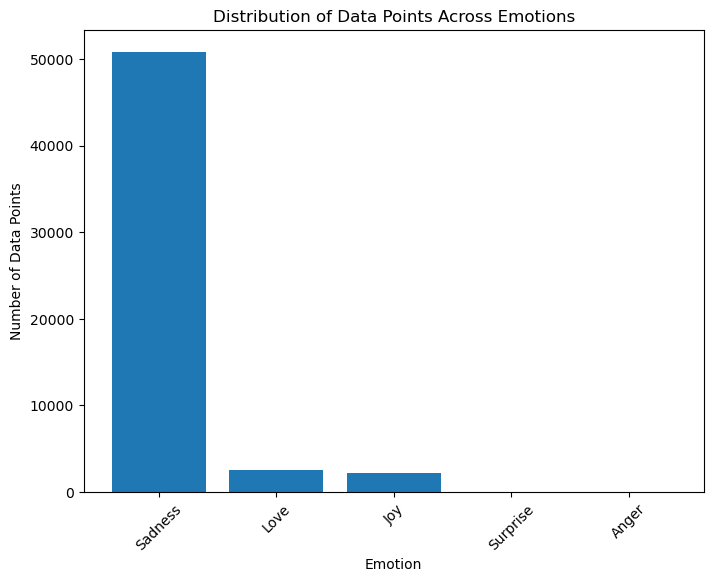

In [19]:
# Plot the distribution of data points across emotions
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Emotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

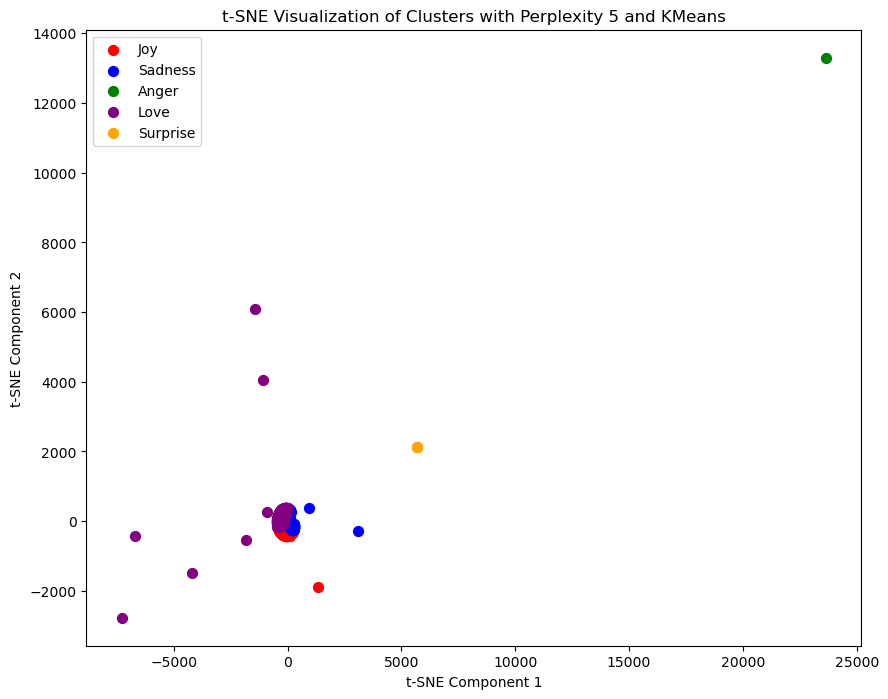

In [20]:
# Plot the t-SNE result with the best perplexity and algorithm
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(len(cluster_emotions)):
    cluster_points = X_reduced[df['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=cluster_emotions[i])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f't-SNE Visualization of Clusters with Perplexity {best_perplexity} and {best_algorithm_name}')
plt.legend()
plt.show()

In [25]:
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_reduced)
    sil_score.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k-Means Cluster')
plt.show()


c:\Users\Nikolas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'numpy.float32' object has no attribute 'append'

In [21]:
# Save the DataFrame with emotions to a new CSV file
output_file_path = 'output_with_emotions_perplexOptimezed_5k.csv'
df.to_csv(output_file_path, index=False)
print(f'Results saved to {output_file_path}')

Results saved to output_with_emotions_perplexOptimezed_5k.csv


In [22]:
# Display the first few rows of the output DataFrame to check
df.head()

,Texts;;;;;;;,processed_text,cluster,emotion
0,i didnt feel humiliated;;;;;;;,didnt feel humiliated,3,Love
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,3,Love
2,im grabbing a minute to post i feel greedy wro...,im grabbing minute post feel greedy wrong,3,Love
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,3,Love
4,i am feeling grouchy;;;;;;;,feeling grouchy,3,Love
